,Name,Meta Share,Tier,Decks,Price
0,Boros Energy,13.70,1,4524,960.0
1,Eldrazi Ramp,10.46,1,3454,652.0
2,Orzhov Blink,8.78,1,2900,779.0
3,Dimir Oculus,5.45,1,1801,801.0
4,Amulet Titan,4.83,1,1594,875.0
...,...,...,...,...,...
275,Simic Adventures,0.01,3,2,98.0
276,As foretold,0.01,3,2,371.0
277,Sultai Murktide,0.01,3,2,1018.0
278,Domain Reanimator,0.01,3,2,924.0


Text(0.5, 1.0, 'Meta Share vs Decks')

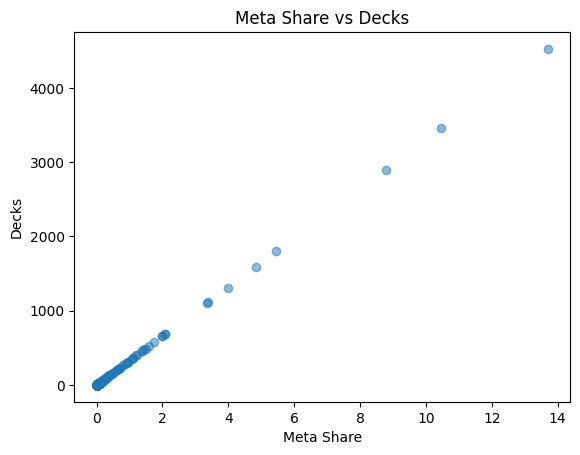

In [2]:
import ast 
money = pd.read_csv('data/money_decks.csv', converters={'Price': ast.literal_eval})
display(money)
plt.scatter(money['Meta Share'], money['Decks'], alpha=0.5)
plt.xlabel('Meta Share')
plt.ylabel('Decks')
plt.title('Meta Share vs Decks')


In [3]:
pip install regressio --upgrade

Note: you may need to restart the kernel to use updated packages.


,Decks,Meta Share,Tier,Price
0,2,0.01,3.000000,800.906977
1,3,0.01,3.000000,710.843750
2,4,0.01,3.000000,642.736842
3,5,0.02,2.571429,594.000000
4,6,0.02,2.000000,822.714286
...,...,...,...,...
91,1594,4.83,1.000000,875.000000
92,1801,5.45,1.000000,801.000000
93,2900,8.78,1.000000,779.000000
94,3454,10.46,1.000000,652.000000


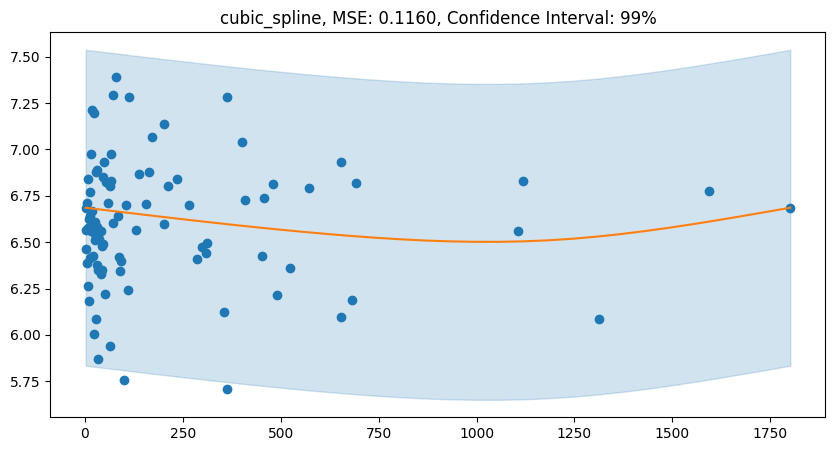

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

winrate_p_deck = pd.read_csv('filter/winrate_per_deck.csv')
matches_p_deck = pd.read_csv('filter/matches_per_deck.csv')
'''
plt.scatter(matches_p_deck['Boros Energy'], winrate_p_deck['Boros Energy'] )
plt.title('Winrate vs Matches of Boros Energy')
plt.xlabel('Number of matches across all available decks')
plt.ylabel('Winrate')
'''


from regressio.models import cubic_spline
from regressio.datagen import generate_random_walk


# Set figsize and seed
plt.rcParams['figure.figsize'] = (10, 5)
np.random.seed(0)

# Generate data sample
#x, y = generate_random_walk(150)

money = money.groupby('Decks', as_index=False).mean()
display(money)
# Fit model and plot result
model = cubic_spline(pieces=3)
money = money[money['Decks'] <= 2000]

model.fit(money['Decks'], np.log(money['Price']) , plot=True, confidence_interval=0.99)

#winrate - matches won/total matches 

#use derivative to find at how many matches a deck is most optimal 

#at each x, if there are multiple winrates, then take the average of them. 


In [7]:
money = pd.read_csv('data/money_decks.csv', converters={'Price': ast.literal_eval})
winrate_p_deck = pd.read_csv('filter/winrate_per_deck.csv')
matches_p_deck = pd.read_csv('filter/matches_per_deck.csv')
winrate = [x for x in winrate_p_deck if x != 'Unnamed: 0']
winrate = [x for x in winrate if x != 'Overall']
winrate = [x for x in winrate if x != 'col name']
prices = [money[money['Name'] == winrate[ind]]['Price'].item() for ind in  range(len(winrate))]

wins = winrate_p_deck
wins.set_index('col name', inplace=True)
wins = wins.transpose()

wins = wins.drop(['Unnamed: 0', 'Overall'])

mapping = []

for ind in wins.index:
    if ind not in list(money['Name']):
        print('yep')
        wins = wins.drop([ind])

wins
money

,Name,Meta Share,Tier,Decks,Price
0,Boros Energy,13.70,1,4524,960.0
1,Eldrazi Ramp,10.46,1,3454,652.0
2,Orzhov Blink,8.78,1,2900,779.0
3,Dimir Oculus,5.45,1,1801,801.0
4,Amulet Titan,4.83,1,1594,875.0
...,...,...,...,...,...
275,Simic Adventures,0.01,3,2,98.0
276,As foretold,0.01,3,2,371.0
277,Sultai Murktide,0.01,3,2,1018.0
278,Domain Reanimator,0.01,3,2,924.0


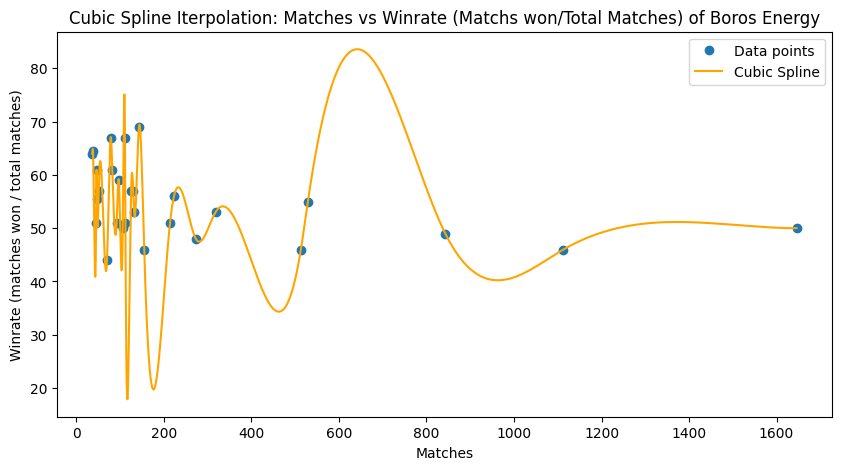

In [8]:
#original

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline


#generate sample pts

matches = pd.read_csv('filter/matches_per_deck.csv')

matches.set_index('col name', inplace=True)
matches = matches.transpose()

matches = matches.drop(['Unnamed: 0', 'Overall'])



current_ind = matches.index[0]

boros_df = pd.DataFrame({'Winrate': wins[current_ind], 'Matches': matches[current_ind]})
#display(boros_df)
print()
boros_df = boros_df.sort_values('Matches')

#display(boros_df)
boros_df = boros_df.groupby('Matches').mean()

#display(boros_df)

x = list(boros_df.index)
y = list(boros_df['Winrate'])

#cs = CubicSpline(x,y, bc_type = 'natural')
#x = [pt/20 for pt in x]

cs = CubicSpline(x,y, bc_type = 'clamped')

#gen find grid for plotting

x_fine = np.linspace(x[0],x[-1], 5000)
y_fine = cs(x_fine)


plt.plot(x,y,'o', label='Data points')
plt.plot(x_fine,y_fine,label='Cubic Spline', color='orange')

ax = plt.gca()
#ax.set_xlim([1,200])
plt.title(f'Cubic Spline Iterpolation: Matches vs Winrate (Matchs won/Total Matches) of {current_ind}')
plt.xlabel('Matches')
plt.ylabel('Winrate (matches won / total matches)')
plt.legend()

plt.show()

Text(0.5, 1.0, 'First Derivative of Matches vs. Winrate of Boros Energy calculated using Np.Gradient')

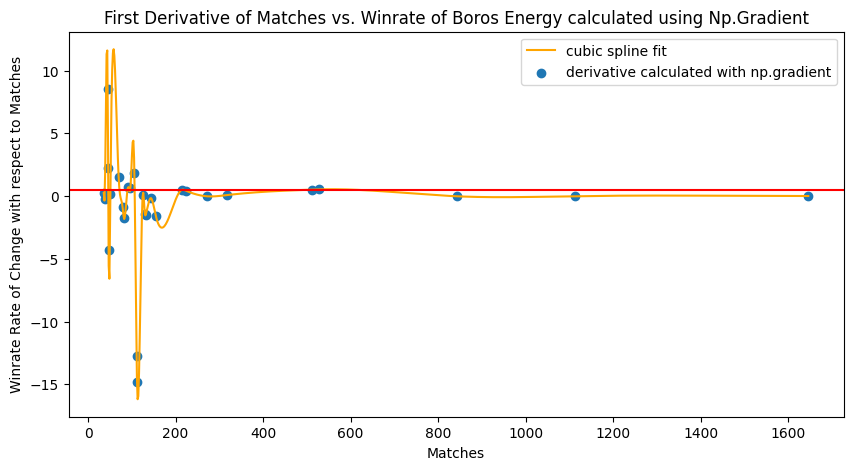

In [9]:
der = np.gradient(y,x)
cs_der = CubicSpline(x,np.gradient(y,x), bc_type = 'clamped')
x_fine = np.linspace(x[0],x[-1], 1000)
y_fine = cs_der(x_fine)

plt.plot(x_fine, y_fine,  color='orange', label='cubic spline fit')

plt.scatter(x,np.gradient(y,x), label='derivative calculated with np.gradient')
plt.ylabel('Winrate Rate of Change with respect to Matches')
plt.xlabel('Matches')
plt.legend(loc='best')
plt.axhline(y=0.5, color='r', linestyle='-')
plt.title(f'First Derivative of Matches vs. Winrate of {current_ind} calculated using Np.Gradient')


In [ ]:
#original

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline


#generate sample pts

matches = pd.read_csv('filter/matches_per_deck.csv')

matches.set_index('col name', inplace=True)
matches = matches.transpose()

matches = matches.drop(['Unnamed: 0', 'Overall'])



current_ind = matches.index[1]

boros_df = pd.DataFrame({'Winrate': wins[current_ind], 'Matches': matches[current_ind]})
#display(boros_df)
print()
boros_df = boros_df.sort_values('Matches')

#display(boros_df)
boros_df = boros_df.groupby('Matches').mean()

#display(boros_df)

x = list(boros_df.index)
y = list(boros_df['Winrate'])

#cs = CubicSpline(x,y, bc_type = 'natural')
#x = [pt/20 for pt in x]

cs = CubicSpline(x,y, bc_type = 'clamped')

#gen find grid for plotting

x_fine = np.linspace(x[0],x[-1], 5000)
y_fine = cs(x_fine)


plt.plot(x,y,'o', label='Data points')
plt.plot(x_fine,y_fine,label='Cubic Spline', color='orange')

ax = plt.gca()
#ax.set_xlim([1,200])
plt.title(f'Cubic Spline Iterpolation: Matches vs Winrate (Matchs won/Total Matches) of {current_ind}')
plt.xlabel('Matches')
plt.ylabel('Winrate (matches won / total matches)')
plt.legend()

plt.show()

In [ ]:
der = np.gradient(y,x)
cs_der = CubicSpline(x,np.gradient(y,x), bc_type = 'clamped')
x_fine = np.linspace(x[0],x[-1], 1000)
y_fine = cs_der(x_fine)

plt.plot(x_fine, y_fine,  color='orange', label='cubic spline fit')

plt.scatter(x,np.gradient(y,x), label='derivative calculated with np.gradient')
plt.ylabel('Winrate Rate of Change with respect to Matches')
plt.xlabel('Matches')
plt.legend(loc='best')
plt.title(f'First Derivative of Matches vs. Winrate of {current_ind} calculated using Np.Gradient')


In [ ]:
#original

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline


#generate sample pts

matches = pd.read_csv('filter/matches_per_deck.csv')

matches.set_index('col name', inplace=True)
matches = matches.transpose()

matches = matches.drop(['Unnamed: 0', 'Overall'])



current_ind = matches.index[2]

boros_df = pd.DataFrame({'Winrate': wins[current_ind], 'Matches': matches[current_ind]})
#display(boros_df)
print()
boros_df = boros_df.sort_values('Matches')

#display(boros_df)
boros_df = boros_df.groupby('Matches').mean()

#display(boros_df)

x = list(boros_df.index)
y = list(boros_df['Winrate'])

#cs = CubicSpline(x,y, bc_type = 'natural')
#x = [pt/20 for pt in x]

cs = CubicSpline(x,y, bc_type = 'clamped')

#gen find grid for plotting

x_fine = np.linspace(x[0],x[-1], 5000)
y_fine = cs(x_fine)


plt.plot(x,y,'o', label='Data points')
plt.plot(x_fine,y_fine,label='Cubic Spline', color='orange')

ax = plt.gca()
#ax.set_xlim([1,200])
plt.title(f'Cubic Spline Iterpolation: Matches vs Winrate (Matchs won/Total Matches) of {current_ind}')
plt.xlabel('Matches')
plt.ylabel('Winrate (matches won / total matches)')
plt.legend()

plt.show()

In [ ]:
der = np.gradient(y,x)
cs_der = CubicSpline(x,np.gradient(y,x), bc_type = 'clamped')
x_fine = np.linspace(x[0],x[-1], 1000)
y_fine = cs_der(x_fine)

plt.plot(x_fine, y_fine,  color='orange', label='cubic spline fit')

plt.scatter(x,np.gradient(y,x), label='derivative calculated with np.gradient')
plt.ylabel('Winrate Rate of Change with respect to Matches')
plt.xlabel('Matches')
plt.legend(loc='best')
plt.title(f'First Derivative of Matches vs. Winrate of {current_ind} calculated using Np.Gradient')


In [ ]:
#original

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline


#generate sample pts

matches = pd.read_csv('filter/matches_per_deck.csv')

matches.set_index('col name', inplace=True)
matches = matches.transpose()

matches = matches.drop(['Unnamed: 0', 'Overall'])



current_ind = matches.index[3]

boros_df = pd.DataFrame({'Winrate': wins[current_ind], 'Matches': matches[current_ind]})
#display(boros_df)
print()
boros_df = boros_df.sort_values('Matches')

#display(boros_df)
boros_df = boros_df.groupby('Matches').mean()

#display(boros_df)

x = list(boros_df.index)
y = list(boros_df['Winrate'])

#cs = CubicSpline(x,y, bc_type = 'natural')
#x = [pt/20 for pt in x]

cs = CubicSpline(x,y, bc_type = 'clamped')

#gen find grid for plotting

x_fine = np.linspace(x[0],x[-1], 5000)
y_fine = cs(x_fine)


plt.plot(x,y,'o', label='Data points')
plt.plot(x_fine,y_fine,label='Cubic Spline', color='orange')

ax = plt.gca()
#ax.set_xlim([1,200])
plt.title(f'Cubic Spline Iterpolation: Matches vs Winrate (Matchs won/Total Matches) of {current_ind}')
plt.xlabel('Matches')
plt.ylabel('Winrate (matches won / total matches)')
plt.legend()

plt.show()

In [ ]:
der = np.gradient(y,x)
cs_der = CubicSpline(x,np.gradient(y,x), bc_type = 'clamped')
x_fine = np.linspace(x[0],x[-1], 1000)
y_fine = cs_der(x_fine)

plt.plot(x_fine, y_fine,  color='orange', label='cubic spline fit')

plt.scatter(x,np.gradient(y,x), label='derivative calculated with np.gradient')
plt.ylabel('Winrate Rate of Change with respect to Matches')
plt.xlabel('Matches')
plt.legend(loc='best')
plt.title(f'First Derivative of Matches vs. Winrate of {current_ind} calculated using Np.Gradient')


# Cubic Spline Regression Below

In [ ]:
money = pd.read_csv('data/money_decks.csv', converters={'Price': ast.literal_eval})
prices = [money[money['Name'] == ind]['Price'].item() for ind in wins.index]
ind = wins.index[0]
print(ind)
#plt.scatter(prices, wins[ind])



from regressio.models import cubic_spline
from regressio.datagen import generate_random_walk
#8 gets 100 mse 
model = cubic_spline(pieces=2)

# Set figsize and seed
plt.rcParams['figure.figsize'] = (10, 5)
np.random.seed(0)

# Generate data sample
#x, y = generate_random_walk(150)

model.fit(np.array(prices),np.log(wins[ind]) , plot=True, confidence_interval=0.99)

#winrate - matches won/total matches 

#use derivative to find at how many matches a deck is most optimal 

#at each x, if there are multiple winrates, then take the average of them. 




In [ ]:
money = pd.read_csv('data/money_decks.csv', converters={'Price': ast.literal_eval})
prices = [money[money['Name'] == ind]['Price'].item() for ind in wins.index]
ind = wins.index[1]
print('name of deck data is relative to')
print(ind)
#plt.scatter(prices, wins[ind])



from regressio.models import cubic_spline
from regressio.datagen import generate_random_walk
#8 gets 100 mse 
model = cubic_spline(pieces=2)

# Set figsize and seed
plt.rcParams['figure.figsize'] = (10, 5)
np.random.seed(0)

# Generate data sample
#x, y = generate_random_walk(150)

model.fit(np.array(prices),np.log(wins[ind]) , plot=True, confidence_interval=0.99)




In [ ]:
money = pd.read_csv('data/money_decks.csv', converters={'Price': ast.literal_eval})
prices = [money[money['Name'] == ind]['Price'].item() for ind in wins.index]
ind = wins.index[2]
print('name of deck data is relative to')
print(ind)
#plt.scatter(prices, wins[ind])



from regressio.models import cubic_spline
from regressio.datagen import generate_random_walk
#8 gets 100 mse 
model = cubic_spline(pieces=2)

# Set figsize and seed
plt.rcParams['figure.figsize'] = (10, 5)
np.random.seed(0)

# Generate data sample
#x, y = generate_random_walk(150)

model.fit(np.array(prices),np.log(wins[ind]) , plot=True, confidence_interval=0.99)



In [ ]:
money = pd.read_csv('data/money_decks.csv', converters={'Price': ast.literal_eval})
prices = [money[money['Name'] == ind]['Price'].item() for ind in wins.index]
ind = wins.index[3]
print('name of deck data is relative to')
print(ind)
#plt.scatter(prices, wins[ind])



from regressio.models import cubic_spline
from regressio.datagen import generate_random_walk
#8 gets 100 mse 
model = cubic_spline(pieces=2)

# Set figsize and seed
plt.rcParams['figure.figsize'] = (10, 5)
np.random.seed(0)

# Generate data sample
#x, y = generate_random_walk(150)

model.fit(np.array(prices),np.log(wins[ind]) , plot=True, confidence_interval=0.99)


